## Introduction

**Data sources**

 * COVID-19 Europe - from John Hopkins  
 * UN Data 4 Europe - from Kaggle / SRK  


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv(os.path.join("..", "data", "johnhopkins-covid19-curated", "covid-19-all.csv"))

In [3]:
un_data_df = pd.read_csv(os.path.join("..", "data", "un-data-country-profiles-kaggle-srk", "country_profile_variables.csv"))

In [4]:
#list(un_data_df.country)

Deltas

* 'Czech Republic' -> Czechia
* 'Russia' -> Russian Federation
* 'North Macedonia' -> 'The former Yugoslav Republic of Macedonia'

In [5]:
eu28plus_countries = ['Austria','Belgium','Italy','Latvia','Bulgaria','Lithuania','Croatia','Luxembourg','Cyprus',
                  'Malta','Czechia','Netherlands','Denmark','Poland','Estonia','Portugal','Finland','Romania',
                  'France','Slovakia','Germany','Slovenia','Greece','Spain','Hungary','Sweden','Ireland','Switzerland', 'Norway', 
                     'Serbia', 'Montenegro', 'The former Yugoslav Republic of Macedonia', 'United Kingdom','Iceland']
#, 'Russian Federation','Israel' ]
eu28plus_countries.sort()
eu28plus_countries_df = pd.DataFrame(eu28plus_countries)
eu28plus_countries_df.columns = ['country']
eu28plus_countries_df.head()

,country
0,Austria
1,Belgium
2,Bulgaria
3,Croatia
4,Cyprus


In [6]:
eu_data_df = un_data_df.merge(eu28plus_countries_df, on='country')

In [7]:
eu_data_df.shape

(34, 50)

In [8]:
df = eu_data_df.copy()
df1 = df.loc[:, df.dtypes == np.object]
df1.columns 

Index(['country', 'Region', 'Surface area (km2)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'Economy: Agriculture (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       'Population growth rate (average annual %)',
       'Urban population growth rate (average annual %)',
       'Fertility rate, total (live births per woman)',
       'Life expectancy at birth (females/males, years)',
       'Population age distribution (0-14 / 60+ years, %)',
       'International migrant stock (000/% of total pop.)',
       'Refugees and others of concern to 

In [9]:
eu_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 50 columns):
country                                                       34 non-null object
Region                                                        34 non-null object
Surface area (km2)                                            34 non-null object
Population in thousands (2017)                                34 non-null int64
Population density (per km2, 2017)                            34 non-null float64
Sex ratio (m per 100 f, 2017)                                 34 non-null float64
GDP: Gross domestic product (million current US$)             34 non-null int64
GDP growth rate (annual %, const. 2005 prices)                34 non-null object
GDP per capita (current US$)                                  34 non-null float64
Economy: Agriculture (% of GVA)                               34 non-null object
Economy: Industry (% of GVA)                                  34 non-null float64
Econ

In [10]:
eu_data_df = eu_data_df.replace("...", "0")

eu_data_df['Labour force participation - female'] = \
    eu_data_df['Labour force participation (female/male pop. %)'].apply(lambda x: float(x.split("/")[0]))

eu_data_df['Labour force participation - male'] = \
    eu_data_df['Labour force participation (female/male pop. %)'].apply(lambda x: float(x.split("/")[1]))
    

In [11]:
eu_data_df['Population age distribution 60+'] = \
    eu_data_df['Population age distribution (0-14 / 60+ years, %)'].apply(lambda x: float(x.split("/")[0]))

eu_data_df['Population age distribution 0-14'] = \
    eu_data_df['Population age distribution (0-14 / 60+ years, %)'].apply(lambda x: float(x.split("/")[1]))


In [12]:
eu_data_df['Life expectancy at birth - females'] = \
    eu_data_df['Life expectancy at birth (females/males, years)'].apply(lambda x: float(x.split("/")[0]))

eu_data_df['Life expectancy at birth - males'] = \
    eu_data_df['Life expectancy at birth (females/males, years)'].apply(lambda x: float(x.split("/")[1]))



In [13]:

eu_data_df['Forested area'] = \
    eu_data_df['Forested area (% of land area)'].apply(lambda x: float(x.split("/")[0]))

eu_data_df['Forested area percent of land area)'] = \
    eu_data_df['Forested area (% of land area)'].apply(lambda x: float(x.split("/")[1]))


In [14]:
string_feature = [
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       #---REPLACED--->'Labour force participation (female/male pop. %)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, current account (million US$)',
       #'Population growth rate (average annual %)',
       #'Urban population growth rate (average annual %)',
       'Fertility rate, total (live births per woman)',
       #---REPLACED--->'Life expectancy at birth (females/males, years)',
       #---REPLACED---> 'Population age distribution (0-14 / 60+ years, %)',
       #'International migrant stock (000/% of total pop.)',
       'Refugees and others of concern to UNHCR (in thousands)',
       'Infant mortality rate (per 1000 live births',
       'Health: Physicians (per 1000 pop.)',
       'Education: Government expenditure (% of GDP)',
       #'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
       #'Education: Secondary gross enrol. ratio (f/m per 100 pop.)',
       #'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Mobile-cellular subscriptions (per 100 inhabitants).1',
       'Threatened species (number)',   
       #'Forested area (% of land area)',
        ]
       #'Energy supply per capita (Gigajoules)'
       #'Pop. using improved drinking water (urban/rural, %)',
       #'Pop. using improved sanitation facilities (urban/rural, %)']
for feature in string_feature:
    eu_data_df[feature] = eu_data_df[feature].apply(lambda x: float(x))



In [15]:
pd.set_option('max_columns', 50)
eu_data_df.head(40)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),...,Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Labour force participation - female,Labour force participation - male,Population age distribution 60+,Population age distribution 0-14,Life expectancy at birth - females,Life expectancy at birth - males,Forested area,Forested area percent of land area)
0,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,28.3,70.4,4.7,25.6,69.7,6.2,54.6/65.8,108,108,145503.0,149299.0,-3795.0,7020.0,0.6,66.0,...,5.2,5.5,102.2/103.7,97.6/102.4,89.2/74.3,30.6,157.4,83.9,118,46.9,58.7/6.9,505,158,100.0/100.0,100.0/100.0,-99,-99,54.6,65.8,14.1,25.1,83.5,78.4,58.7,6.9
1,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,0.7,22.2,77.1,1.2,21.2,77.6,8.3,48.1/58.9,108,107,398033.0,372713.0,25321.0,1936.0,0.6,97.9,...,3.0,6.6,104.2/104.2,177.7/156.4,85.4/65.0,38.0,115.7,85.1,37,22.6,93.4/8.3,520,196,100.0/100.0,99.5/99.4,-99,-99,48.1,58.9,17.1,24.6,83.0,78.0,93.4,8.3
2,Bulgaria,EasternEurope,111002,7085,65.3,94.6,48953,3.0,6846.8,5.1,27.6,67.2,6.5,29.4,64.1,8.1,48.5/60.1,117,119,26088.0,28875.0,-2787.0,196.0,-0.6,73.9,...,4.0,4.1,96.7/97.7,97.4/100.5,82.9/65.4,19.2,129.3,56.7,104,35.1,42.4/5.9,474,103,99.6/99.0,86.8/83.7,-99,-99,48.5,60.1,14.2,27.7,77.8,70.8,42.4,5.9
3,Croatia,SouthernEurope,56594,4189,74.9,93.1,48676,1.6,11479.4,4.1,26.6,69.3,9.2,26.8,64.0,11.7,46.3/58.4,91,91,13648.0,21830.0,-8182.0,2492.0,-0.4,59.0,...,3.1,4.6,98.1/97.8,100.6/95.9,79.8/58.8,19.9,103.8,69.8,176,34.3,16.8/4.0,182,79,99.6/99.7,97.8/95.8,0,-99,46.3,58.4,14.7,26.8,80.4,73.6,16.8,4.0
4,Cyprus,WesternAsia,9251,1180,127.7,100.2,19561,1.7,21941.9,2.3,10.6,87.2,4.1,16.7,79.2,10.3,57.8/70.4,80,80,1920.0,6604.0,-4684.0,-576.0,0.9,66.9,...,2.5,6.1,99.3/99.3,99.4/100.1,69.4/51.1,17.9,95.4,71.7,72,18.7,6.1/5.2,5,72,100.0/100.0,100.0/100.0,-99,-99,57.8,70.4,16.8,18.5,82.2,77.7,6.1,5.2
5,Czechia,EasternEurope,78868,10618,137.5,96.7,185156,4.5,17561.7,2.5,37.8,59.7,2.5,37.0,60.5,3.9,51.3/67.8,102,102,161248.0,140316.0,20932.0,1683.0,0.1,73.0,...,3.7,4.1,99.9/99.6,106.1/105.1,76.3/54.2,20.0,129.2,81.3,53,34.5,96.5/9.2,1221,164,100.0/100.0,99.1/99.2,-99,-99,51.3,67.8,15.4,25.6,81.2,75.1,96.5,9.2
6,Denmark,NorthernEurope,42921,5734,135.1,99.0,301308,1.6,53149.3,1.2,22.9,75.8,2.4,19.2,78.4,6.0,58.1/66.0,105,105,94355.0,85133.0,9222.0,27582.0,0.5,87.7,...

In [16]:
#eu_data_df.columns

## COVID-19 data Europe

In [17]:
#eu28plus_countries_df.country

In [18]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Country'] = data_df['Country/Region']
data_df['Province'] = data_df['Province/State']

data_ct = data_df.sort_values(by = ['Country','Date'], ascending=False)
filtered_data_ct_last = data_ct.drop_duplicates(subset = ['Country'], keep='first')
data_ct_agg = data_ct.groupby(['Date', 'Country']).sum().reset_index()
data_ct_agg['Active'] = data_ct_agg['Confirmed'] - data_ct_agg['Deaths'] - data_ct_agg['Recovered']
data_ct_agg['country'] = data_ct_agg['Country']
data_ct_agg = data_ct_agg.replace("Check Republic", 'Czechia')
data_ct_agg = data_ct_agg.replace("North Macedonia", 'The former Yugoslav Republic of Macedonia')


In [19]:
# total cases / country

covid_eu_df = data_ct_agg.merge(eu28plus_countries_df, on='country')


In [20]:
covid_eu_df.head()

,Date,Country,Latitude,Longitude,Confirmed,Recovered,Deaths,Active,country
0,2020-01-24,France,14.6415,-56.3159,2.0,0.0,0.0,2.0,France
1,2020-01-25,France,14.6415,-56.3159,3.0,0.0,0.0,3.0,France
2,2020-01-26,France,14.6415,-56.3159,3.0,0.0,0.0,3.0,France
3,2020-01-27,France,14.6415,-56.3159,3.0,0.0,0.0,3.0,France
4,2020-01-28,France,14.6415,-56.3159,4.0,0.0,0.0,4.0,France


#### Calculate COVID-19 evolution indicators

In [21]:
add_data_df = pd.DataFrame()
for country in covid_eu_df.country.unique():
    df_ = covid_eu_df.loc[covid_eu_df.country==country]
    max_active = max(df_.Active) 
    max_date = max(df_.Date)
    active_last_day = df_.loc[df_.Date==max_date, 'Active'].values[0]
    percent_last_from_max = active_last_day / max_active
    last_day = df_.loc[df_.Date == max_date, 'Date'].values[0]
    #print(country, " ", max_active, np.round(percent_last_from_max,3)) 
    add_data_df = add_data_df.append(pd.DataFrame({'country': country, 
                                                   "Maximum Actives":max_active,
                                                   "Current percent from Max Active": percent_last_from_max},
                                                  index=[0]))

In [22]:
add_data_df.head()

,country,Maximum Actives,Current percent from Max Active
0,France,98649.0,0.928464
0,Germany,72864.0,0.133825
0,Finland,2865.0,0.352531
0,Italy,108257.0,0.403586
0,Sweden,27747.0,1.000000


In [23]:
covid_max_df = covid_eu_df.groupby(['country'])[['Confirmed', 'Recovered', 'Deaths', ]].max().reset_index()

In [24]:
covid_max_df.head()

,country,Confirmed,Recovered,Deaths
0,Austria,16685.0,15520.0,668.0
1,Belgium,58186.0,15769.0,9453.0
2,Bulgaria,2499.0,1064.0,139.0
3,Croatia,2246.0,2063.0,103.0
4,Cyprus,944.0,790.0,17.0


In [25]:
covid_max_df = covid_max_df.merge(add_data_df, on='country')

In [26]:
covid_max_df.head()

,country,Confirmed,Recovered,Deaths,Maximum Actives,Current percent from Max Active
0,Austria,16685.0,15520.0,668.0,9334.0,0.053246
1,Belgium,58186.0,15769.0,9453.0,32964.0,1.000000
2,Bulgaria,2499.0,1064.0,139.0,1513.0,0.856576
3,Croatia,2246.0,2063.0,103.0,1258.0,0.063593
4,Cyprus,944.0,790.0,17.0,692.0,0.197977


In [27]:
eu_data_df = eu_data_df.merge(covid_max_df, on = 'country')

In [28]:
eu_data_df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),...,Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Labour force participation - female,Labour force participation - male,Population age distribution 60+,Population age distribution 0-14,Life expectancy at birth - females,Life expectancy at birth - males,Forested area,Forested area percent of land area),Confirmed,Recovered,Deaths,Maximum Actives,Current percent from Max Active
0,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,28.3,70.4,4.7,25.6,69.7,6.2,54.6/65.8,108,108,145503.0,149299.0,-3795.0,7020.0,0.6,66.0,...,30.6,157.4,83.9,118,46.9,58.7/6.9,505,158,100.0/100.0,100.0/100.0,-99,-99,54.6,65.8,14.1,25.1,83.5,78.4,58.7,6.9,16685.0,15520.0,668.0,9334.0,0.053246
1,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,0.7,22.2,77.1,1.2,21.2,77.6,8.3,48.1/58.9,108,107,398033.0,372713.0,25321.0,1936.0,0.6,97.9,...,38.0,115.7,85.1,37,22.6,93.4/8.3,520,196,100.0/100.0,99.5/99.4,-99,-99,48.1,58.9,17.1,24.6,83.0,78.0,93.4,8.3,58186.0,15769.0,9453.0,32964.0,1.000000
2,Bulgaria,EasternEurope,111002,7085,65.3,94.6,48953,3.0,6846.8,5.1,27.6,67.2,6.5,29.4,64.1,8.1,48.5/60.1,117,119,26088.0,28875.0,-2787.0,196.0,-0.6,73.9,...,19.2,129.3,56.7,104,35.1,42.4/5.9,474,103,99.6/99.0,86.8/83.7,-99,-99,48.5,60.1,14.2,27.7,77.8,70.8,42.4,5.9,2499.0,1064.0,139.0,1513.0,0.856576
3,Croatia,SouthernEurope,56594,4189,74.9,93.1,48676,1.6,11479.4,4.1,26.6,69.3,9.2,26.8,64.0,11.7,46.3/58.4,91,91,13648.0,21830.0,-8182.0,2492.0,-0.4,59.0,...,19.9,103.8,69.8,176,34.3,16.8/4.0,182,79,99.6/99.7,97.8/95.8,0,-99,46.3,58.4,14.7,26.8,80.4,73.6,16.8,4.0,2246.0,2063.0,103.0,1258.0,0.063593
4,Cyprus,WesternAsia,9251,1180,127.7,100.2,19561,1.7,21941.9,2.3,10.6,87.2,4.1,16.7,79.2,10.3,57.8/70.4,80,80,1920.0,6604.0,-4684.0,-576.0,0.9,66.9,...,17.9,95.4,71.7,72,18.7,6.1/5.2,5,72,100.0/100.0,100.0/100.0,-99,-99,57.8,70.4,16.8,18.5,82.2,77.7,6.1,5.2,944.0,790.0,17.0,692.0,0.197977


In [55]:
eu_data_df['confirmed_percent_population'] = eu_data_df['Confirmed'] / eu_data_df['Population in thousands (2017)']
eu_data_df['recovered_percent_population'] = eu_data_df['Recovered'] / eu_data_df['Population in thousands (2017)']
eu_data_df['deaths_percent_population'] = eu_data_df['Deaths'] / eu_data_df['Population in thousands (2017)']
eu_data_df['max_active_percent_population'] = eu_data_df['Maximum Actives'] / eu_data_df['Population in thousands (2017)']

In [56]:
filter_countries = ['EasternEurope']
filter_eu_data_df = eu_data_df.loc[eu_data_df.Region.isin(filter_countries)]

In [57]:
#grouped_eu_data_df = eu_data_df.groupby(['Region']).mean().reset_index()

<Figure size 432x288 with 0 Axes>

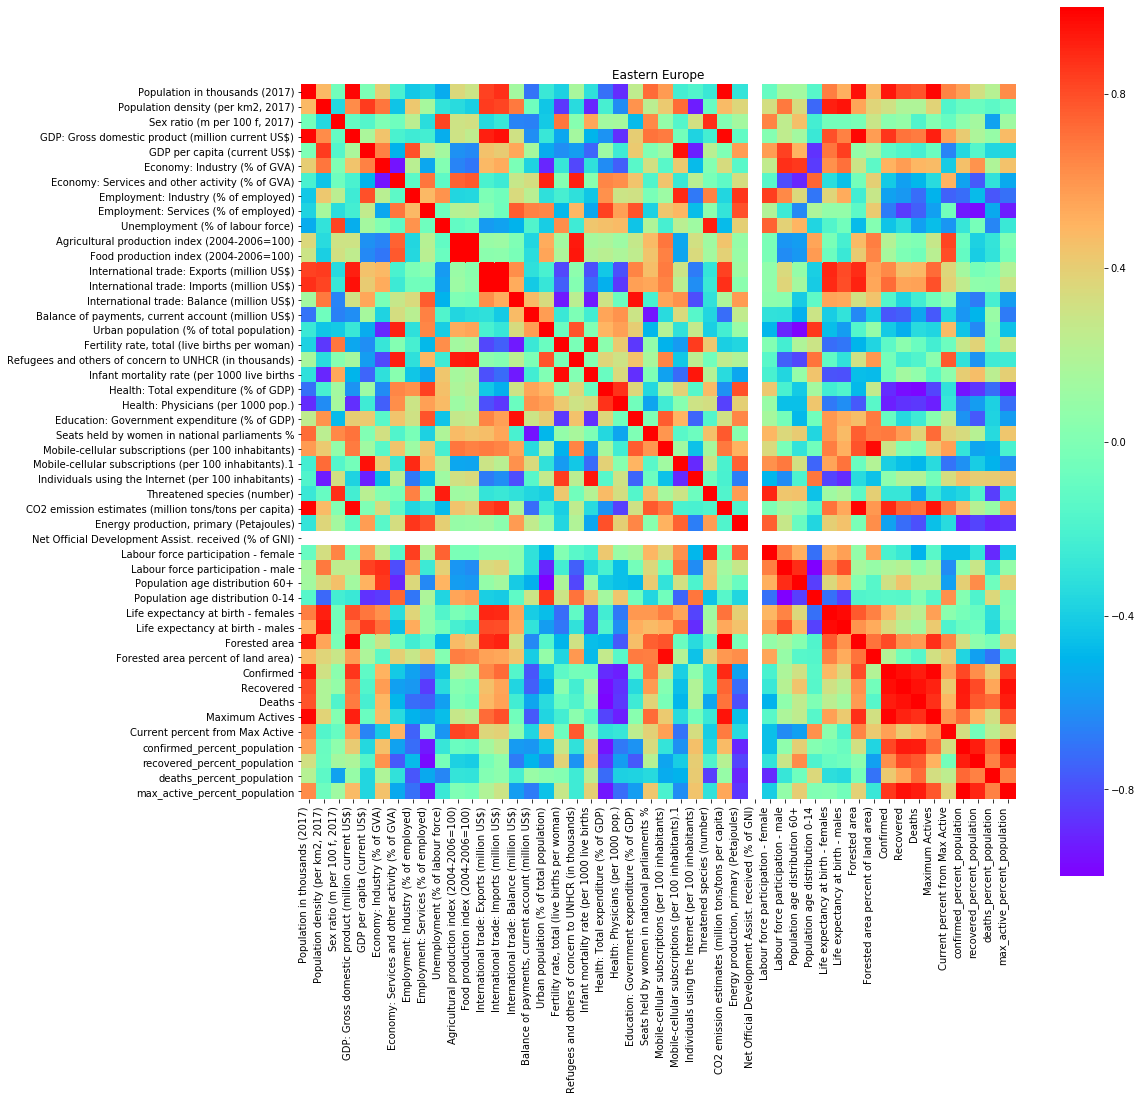

In [58]:
corr = filter_eu_data_df.corr()
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(16,16))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rainbow",#sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    
);
plt.title('Eastern Europe')
plt.show()

<Figure size 432x288 with 0 Axes>

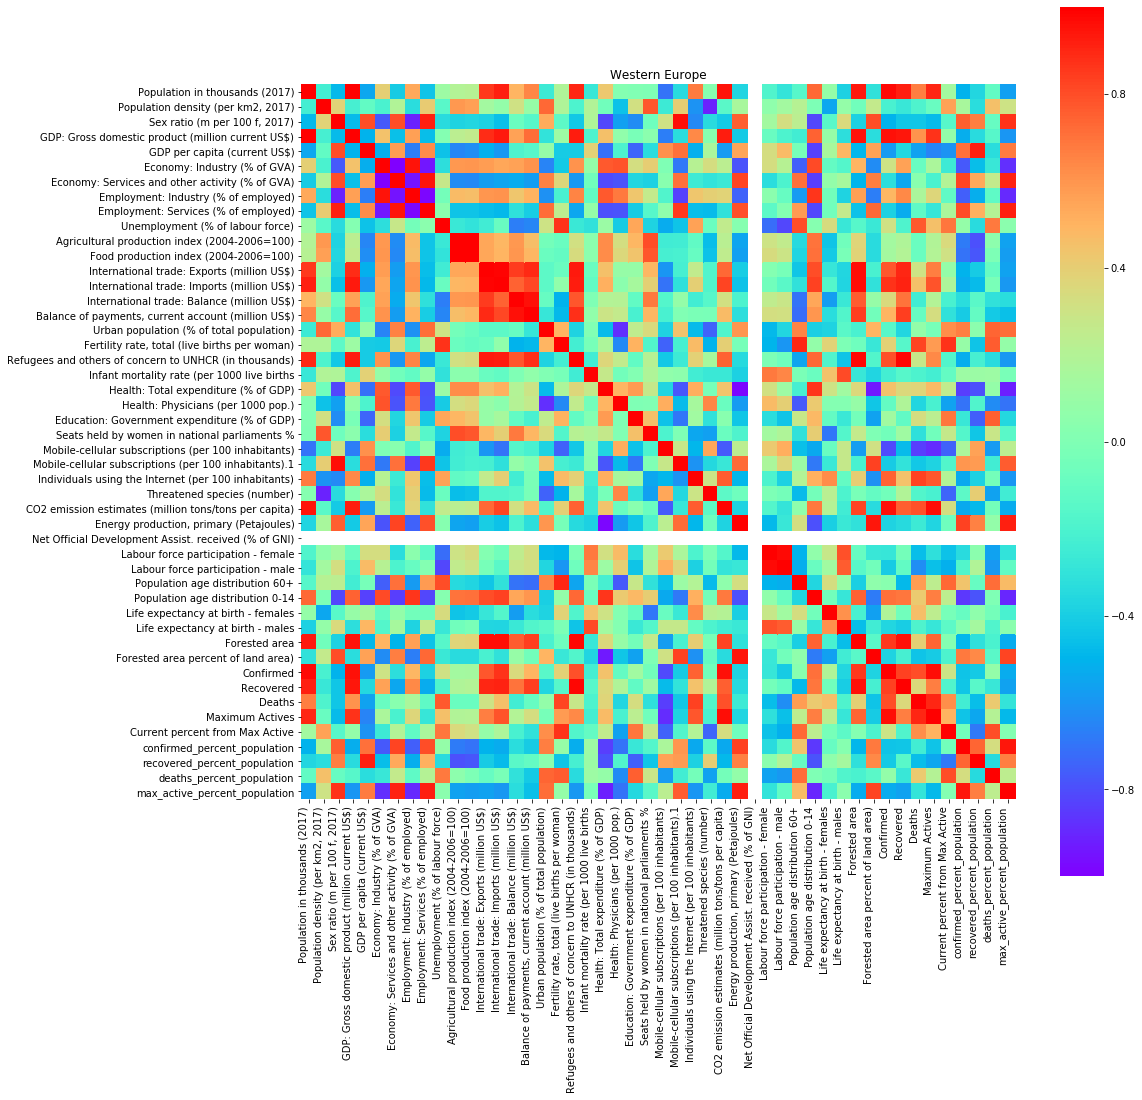

In [60]:
filter_countries = ['WesternEurope']
filter_eu_data_df = eu_data_df.loc[eu_data_df.Region.isin(filter_countries)]
corr = filter_eu_data_df.corr()
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(16,16))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rainbow",#sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    
);
plt.title('Western Europe')
plt.show()

<Figure size 432x288 with 0 Axes>

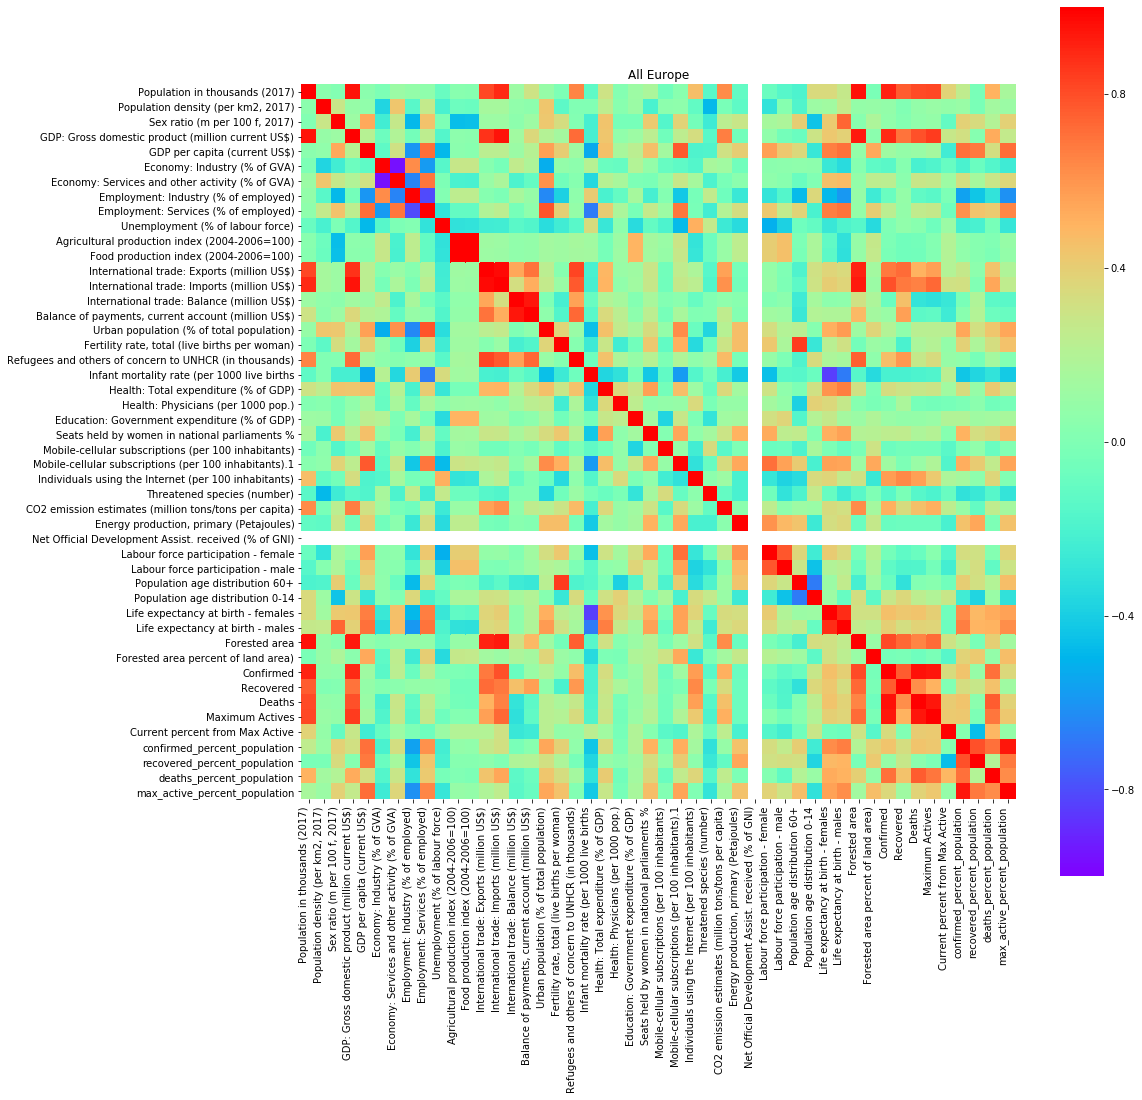

In [61]:
corr = eu_data_df.corr()
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(16,16))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rainbow",#sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    
);
plt.title('All Europe')
plt.show()

In [78]:
eu_data_df.to_csv("..//data//processed//un_europe_country_data_covid19.csv", index=False)

In [62]:
def plot_time_variation_countries_group_of_features(df, countries, features,title):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,6,figsize=(20, 20))

    for country in countries:
        plt.subplot(6,6,i + 1)
        df_ = df[(df['Country']==country) & (df['Date'] > '2020-02-01')] 
        df_['date'] = df_['Date'].apply(lambda x: x.timetuple().tm_yday)
        for feature in features:
            g = sns.lineplot(x="date", y=feature, data=df_,  label=feature)
        plt.title(f'{country}') 
        plt.xlabel('')
        i = i + 1
    fig.suptitle(title, fontsize=20)
    plt.show()  

In [63]:
eu28plus_countries = ['Austria','Belgium','Italy','Latvia','Bulgaria','Lithuania','Croatia','Luxembourg','Cyprus',
                  'Malta','Czech Republic','Netherlands','Denmark','Poland','Estonia','Portugal','Finland','Romania',
                  'France','Slovakia','Germany','Slovenia','Greece','Spain','Hungary','Sweden','Ireland','Switzerland', 'Norway', 'Israel',
                     'Serbia', 'Montenegro', 'North Macedonia', 'United Kingdom', 'Russia', 'Iceland']
features = ['Recovered', 'Active']
eu28plus_countries.sort()

<Figure size 432x288 with 0 Axes>

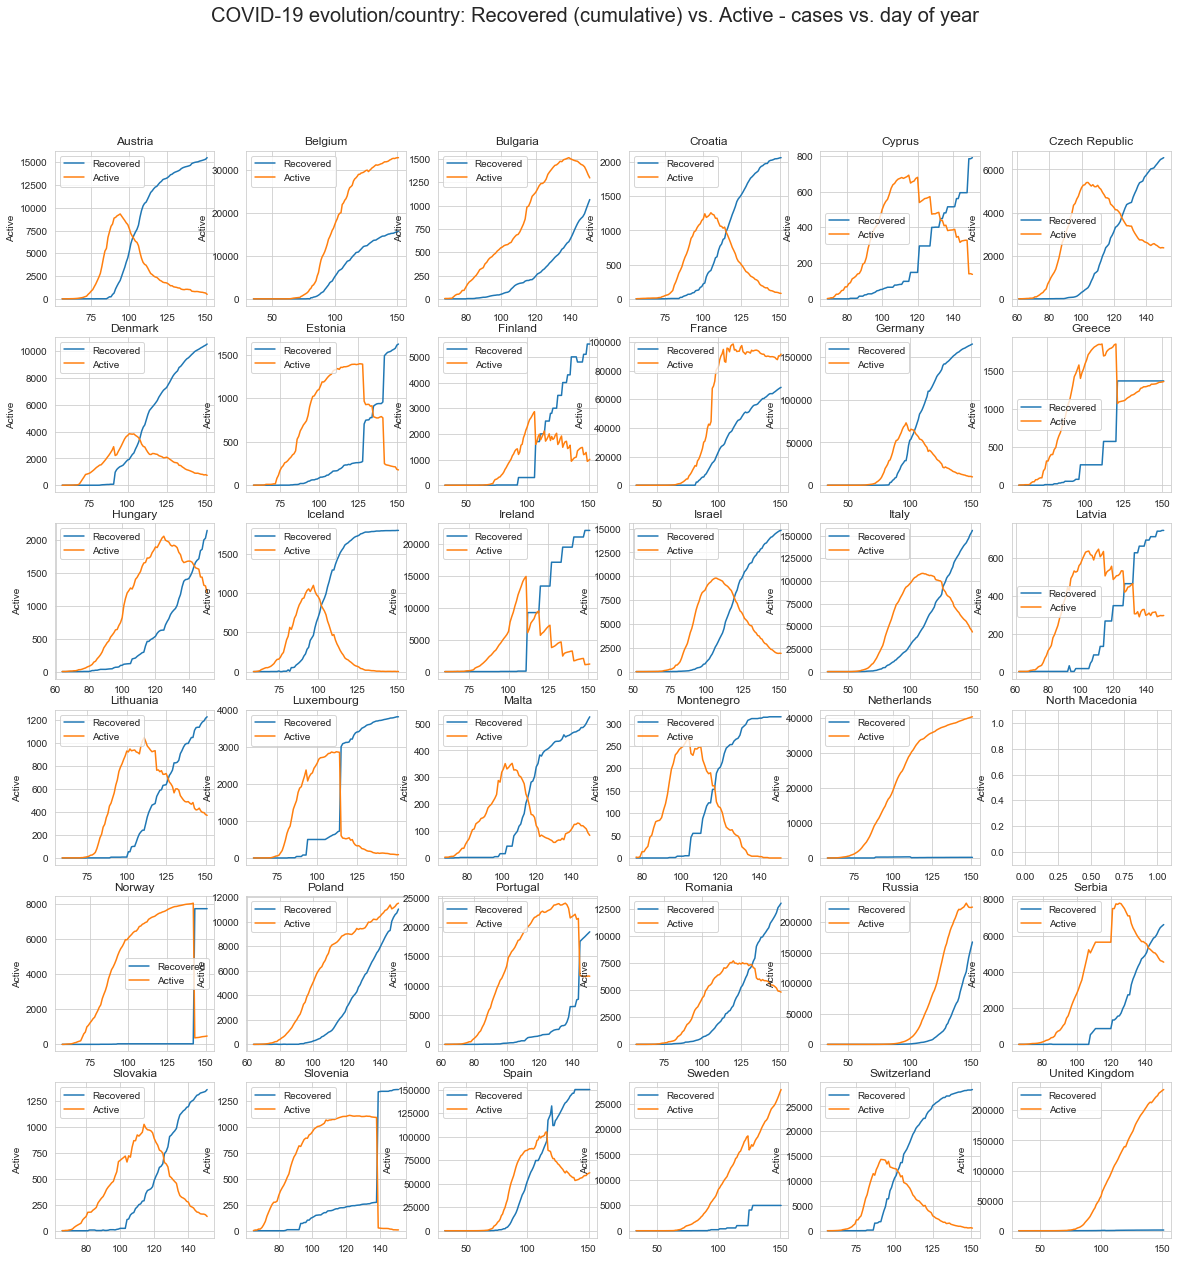

In [64]:
plot_time_variation_countries_group_of_features(data_ct_agg, eu28plus_countries, features, 
                            'COVID-19 evolution/country: Recovered (cumulative) vs. Active - cases vs. day of year')

In [65]:
data_ps = data_df.sort_values(by = ['Province','Date'], ascending=False)
filtered_data_ps = data_ps.drop_duplicates(subset = ['Province'],keep='first').reset_index()

data_cr = data_df.sort_values(by = ['Country','Date'], ascending=False)
filtered_data_cr = data_cr.drop_duplicates(subset = ['Country'],keep='first').reset_index()

filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Latitude.isna()]
filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Longitude.isna()]
filtered_data = pd.concat([filtered_data_cr, filtered_data_ps], axis=0).reset_index()

filtered_data = filtered_data.loc[filtered_data.Country.isin(eu28plus_countries)]

In [66]:
m = folium.Map(location=[54,15], zoom_start=4)
max_val = max(filtered_data['Confirmed'])
HeatMap(data=filtered_data[['Latitude', 'Longitude', 'Confirmed']],\
        radius=20, max_zoom=16).add_to(m)
m